## 미니배치 버전 파이썬 구현

In [1]:
import numpy as np

X = np.random.rand(10,2)  # 랜덤 배열을 생성, shape: (10,2)
X

array([[0.8610077 , 0.97873521],
       [0.13360778, 0.36775295],
       [0.20115851, 0.75750029],
       [0.40009906, 0.47577122],
       [0.29243697, 0.9517425 ],
       [0.61248455, 0.27466155],
       [0.15600657, 0.04863255],
       [0.91912229, 0.50305898],
       [0.902227  , 0.70324391],
       [0.43940244, 0.28910561]])

In [2]:
W1 = np.random.rand(2,4)
W1

array([[0.38438807, 0.29814964, 0.1806252 , 0.47797258],
       [0.29188334, 0.80171973, 0.86607853, 0.57493383]])

In [3]:
b1 = np.random.rand(4)
b1

array([0.94447013, 0.64000641, 0.79226813, 0.74010328])

In [4]:
H = np.matmul(X,W1) + b1
H
# (10, 2) * (2, 4) = (10,4)

array([[1.56110772, 1.68138687, 1.79544937, 1.71434933],
       [1.10316833, 0.97467632, 1.134904  , 1.01539775],
       [1.24289477, 1.30728467, 1.48465716, 1.27176407],
       [1.23713313, 1.14073098, 1.27659134, 1.20487663],
       [1.33467719, 1.49022713, 1.66937336, 1.42706909],
       [1.26007101, 1.04282004, 1.14077675, 1.19076632],
       [1.01863222, 0.72550939, 0.86256645, 0.84263064],
       [1.44460431, 1.3173547 , 1.39397336, 1.46864416],
       [1.49654061, 1.47280958, 1.56429752, 1.57566176],
       [1.19775629, 1.00279576, 1.12202344, 1.11634219]])

## 시그모이드 함수

In [5]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

In [6]:
np.exp(1)

2.718281828459045

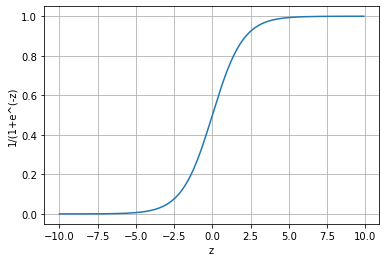

In [7]:
import matplotlib.pyplot as plt
zs = np.arange(-10,10,0.1)
gs = [sigmoid(z) for z in zs]
# print('zs:',zs)
# print('gs:',gs)
plt.plot(zs,gs)
plt.xlabel('z')     # z = X*W + b
plt.ylabel('1/(1+e^(-z)')
plt.grid()
plt.show()

In [8]:
# 1 layer Logistic Regression(Binary Classification, 2진 분류)
X = np.random.rand(10,2)
W1 = np.random.rand(2,4)
b1 = np.random.rand(4)
a = np.matmul(X,W1) + b1
h = sigmoid(a)
h

array([[0.69586733, 0.77889997, 0.73810141, 0.71778377],
       [0.73494082, 0.77318933, 0.72024097, 0.69408918],
       [0.76505523, 0.80722007, 0.77419348, 0.71247116],
       [0.65631948, 0.72980307, 0.65937734, 0.6915355 ],
       [0.63267848, 0.71580891, 0.6394941 , 0.68991262],
       [0.7470354 , 0.80246069, 0.76943422, 0.71676325],
       [0.65952285, 0.73187559, 0.66239117, 0.69191042],
       [0.61026371, 0.69407666, 0.60595676, 0.68160902],
       [0.66137659, 0.72129832, 0.64326163, 0.68207425],
       [0.7388788 , 0.78168022, 0.73453062, 0.70028001]])

In [9]:
# 2 layers Logistic Regression(Binary Classification, 2진 분류)
X = np.random.rand(10,2)

W1 = np.random.rand(2,4)
b1 = np.random.rand(4)

W2 = np.random.rand(4,3)
b2 = np.random.rand(3)

# layer 1
a1 = np.matmul(X,W1) + b1
s1 = sigmoid(a1)

# layer 2
a2 = np.matmul(s1,W2) + b2
h = sigmoid(a2)
h

array([[0.90480051, 0.8904716 , 0.78936323],
       [0.90758732, 0.89242764, 0.79307527],
       [0.89616715, 0.88370624, 0.7787214 ],
       [0.90045979, 0.88750646, 0.78363937],
       [0.87821371, 0.86564445, 0.76066209],
       [0.89760577, 0.88544253, 0.78003419],
       [0.88870677, 0.87551107, 0.77144459],
       [0.89580593, 0.88234748, 0.77899163],
       [0.8981708 , 0.88632732, 0.78040284],
       [0.89363574, 0.88281834, 0.7749492 ]])

## 계층으로 클래스화 및 순전파 구현

In [10]:
class Sigmoid:
    def __init__(self):
        self.params = []
        
    def forward(self,x):
        return 1 / (1 + np.exp(-x))
        
class Affine: # 행렬의 내적을 아핀(Affine) 변환이라고 하며, Affine 계층을 통해 이 변환을 수행처리함 
    def __init__(self,W,b):
        self.params = [W,b]
        
    def forward(self,x):
        W,b = self.params
        out = np.dot(x,W) + b
        return out

In [11]:
# 학습 모델
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # Weight과 bias 초기화
        W1 = np.random.rand(I,H)
        b1 = np.random.rand(H)

        W2 = np.random.rand(H,O)
        b2 = np.random.rand(O)
        
        # 계층 생성
        self.layers = [
            Affine(W1,b1),
            Sigmoid(),
            Affine(W2,b2),
            Sigmoid()
        ]
        
        self.params = []
        for layer in self.layers: # 4회
            self.params += layer.params
            
    def predict(self,x):
        for layer in self.layers: # 4회
            x = layer.forward(x)
            
        return x
    
# t = TwoLayerNet(2,3,4)    
# t.params

In [12]:
#  # 모든 가중치를 리스트에 모은다.
#         self.params = []
#         for layer in self.layers:
#             self.params += layer.params
# 위 코드 설명: 누적 덧셈
a = ['W1', 'b1']
a += ['W2', 'b2']
a

['W1', 'b1', 'W2', 'b2']

In [13]:
# 예측 코드
X = np.random.rand(10,2)
model = TwoLayerNet(2,3,4)

# 여기에서는 학습 수행 부분은 없음
# random 값을 그대로 가중치(파라메터)로 사용
h = model.predict(X)
print(h,h.shape)
# (10,2)*(2,3) -> (10,3) * (3,4) --> (10,4)

[[0.82035992 0.77179415 0.70633668 0.84327289]
 [0.83212279 0.77862371 0.71255587 0.85379169]
 [0.81500933 0.76980701 0.70507524 0.84012057]
 [0.82471346 0.77565146 0.71066718 0.84929574]
 [0.81922194 0.77084144 0.70530448 0.84177555]
 [0.79676215 0.7611398  0.69772525 0.82593351]
 [0.80498232 0.76513799 0.70123337 0.83257279]
 [0.81942766 0.77169695 0.70647988 0.84311546]
 [0.82593258 0.77623079 0.71111667 0.85018006]
 [0.81977797 0.77254713 0.70763999 0.84446061]] (10, 4)
